# Projeto I - Data Science

## Guilherme Zanin - RA: 221026479

# Ansiedade x Redes Sociais

O tema do trabalho consiste na investigação da ansiedade gerada aos seres humanos através da utilização das Redes Sociais. 

Os dados foram obtidos através do formulário criado: https://docs.google.com/forms/d/1hOodJk2SkvQQZkBWrWdqtC2xsm6Hf6RdeP3LTQFKVvc/edit#responses

## Importação dos Dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv('redes_sociais_x_ansiedade.csv')
dados

,Carimbo de data/hora,Nome de usuário,Qual a sua idade?,Qual o seu gênero?,Você utiliza redes sociais com qual frequência,"Quantas horas, em média, você passa por dia em redes sociais?",Qual rede social você mais utiliza?,Você sente ansiedade relacionada ao conteúdo visto nas redes sociais?,Você já se comparou negativamente com outras pessoas por causa das redes sociais?,"Na sua percepção, quanto as redes sociais impactam sua saúde mental?",Qual a sua principal razão para usar redes sociais?,Unnamed: 11
0,2025/05/02 3:09:52 PM GMT-3,NaN,20,Masculino,Todos os dias,2.0,Instagram,Nunca,Sim,0,Entretenimento,5
1,2025/05/02 3:10:29 PM GMT-3,NaN,24,Masculino,Todos os dias,230.0,Instagram,Raramente,Não,1,Manter contato com amigos e familiares,"Nenhuma, ela abre sozinha"
2,2025/05/02 3:10:48 PM GMT-3,NaN,21,Masculino,Todos os dias,2.5,TikTok,Frequentemente,Não,3,Entretenimento,20
3,2025/05/02 3:15:01 PM GMT-3,NaN,20,Feminino,Todos os dias,3.0,Instagram,Às vezes,Sim,6,Acompanhar notícias e eventos,10
4,2025/05/02 3:15:18 PM GMT-3,NaN,25,Masculino,Todos os dias,3.0,Instagram,Raramente,Não,5,Entretenimento,Muitas
5,2025/05/02 3:52:03 PM GMT-3,lucca.comerao@unesp.br,21,Masculino,Todos os dias,4.0,Twitter,Raramente,Sim,3,Entretenimento,10
6,2025/05/02 6:37:24 PM GMT-3,irineumassari1@hotmail.com,22,Masculino,Todos os dias,2.0,Instagram,Nunca,Não,2,Acompanhar notícias e eventos,Incontáveis.
7,2025/05/03 11:02:29 AM GMT-3,dewcmer69@gmail.com,21,Masculino,Todos os dias,5.0,TikTok,Frequentemente,Sim,10,Entretenimento,5
8,2025/05/03 11:06:03 AM GMT-3,vezanin181@gmail.com,54,Feminino,Todos os dias,8.0,Instagram,Sempre,Sim,10,Entretenimento,NaN
9,2025/05/03 11:14:48 AM GMT-3,pedro.victor@unesp.br,31,Masculino,Algumas vezes na semana,4.0,Instagram,Frequentemente,Sim,7,Entretenimento,NaN


Pela visualização inicial do csv, precisaremos analisar a melhor forma de tratar os dados, visto que, alguns usuários, não especiificaram seu email e, também, uma pergunta foi excluida do formulario, sendo necessário a realização da respectiva remoção.

# Limpeza dos Dados

### Alteração das Colunas

Para facilitar a manipulação das colunas, faremos uma alteração no nome das respectivas para variáveis qualitativas nominais, com a formação correta dos nomes, sendo reduzidos, claros e evitando espaços desnecessários.

In [4]:
dados.columns

Index(['Carimbo de data/hora', 'Nome de usuário', 'Qual a sua idade?',
       'Qual o seu gênero?', 'Você utiliza redes sociais com qual frequência',
       'Quantas horas, em média, você passa por dia em redes sociais?',
       'Qual rede social você mais utiliza?',
       'Você sente ansiedade relacionada ao conteúdo visto nas redes sociais?',
       'Você já se comparou negativamente com outras pessoas por causa das redes sociais?',
       'Na sua percepção, quanto as redes sociais impactam sua saúde mental?',
       'Qual a sua principal razão para usar redes sociais?', 'Unnamed: 11'],
      dtype='object')

In [6]:
dados.rename(columns = {'Carimbo de data/hora': 'data', 'Nome de usuário': 'nome', 'Qual a sua idade?': 'idade', 'Qual o seu gênero?': 'genero', 'Você utiliza redes sociais com qual frequência': 'frequencia_uso', 'Quantas horas, em média, você passa por dia em redes sociais?': 'media_uso', 'Qual rede social você mais utiliza?': 'redes_mais_usada', 'Você sente ansiedade relacionada ao conteúdo visto nas redes sociais?': 'ansiedade_conteudo', 'Você já se comparou negativamente com outras pessoas por causa das redes sociais?': 'comparacao_rede', 'Na sua percepção, quanto as redes sociais impactam sua saúde mental?': 'impacto_redes_saude_mental', 'Qual a sua principal razão para usar redes sociais?': 'razao_uso_rede'}, inplace = True)

In [8]:
dados

,data,nome,idade,genero,frequencia_uso,media_uso,redes_mais_usada,ansiedade_conteudo,comparacao_rede,impacto_redes_saude_mental,razao_uso_rede,Unnamed: 11
0,2025/05/02 3:09:52 PM GMT-3,NaN,20,Masculino,Todos os dias,2.0,Instagram,Nunca,Sim,0,Entretenimento,5
1,2025/05/02 3:10:29 PM GMT-3,NaN,24,Masculino,Todos os dias,230.0,Instagram,Raramente,Não,1,Manter contato com amigos e familiares,"Nenhuma, ela abre sozinha"
2,2025/05/02 3:10:48 PM GMT-3,NaN,21,Masculino,Todos os dias,2.5,TikTok,Frequentemente,Não,3,Entretenimento,20
3,2025/05/02 3:15:01 PM GMT-3,NaN,20,Feminino,Todos os dias,3.0,Instagram,Às vezes,Sim,6,Acompanhar notícias e eventos,10
4,2025/05/02 3:15:18 PM GMT-3,NaN,25,Masculino,Todos os dias,3.0,Instagram,Raramente,Não,5,Entretenimento,Muitas
5,2025/05/02 3:52:03 PM GMT-3,lucca.comerao@unesp.br,21,Masculino,Todos os dias,4.0,Twitter,Raramente,Sim,3,Entretenimento,10
6,2025/05/02 6:37:24 PM GMT-3,irineumassari1@hotmail.com,22,Masculino,Todos os dias,2.0,Instagram,Nunca,Não,2,Acompanhar notícias e eventos,Incontáveis.
7,2025/05/03 11:02:29 AM GMT-3,dewcmer69@gmail.com,21,Masculino,Todos os dias,5.0,TikTok,Frequentemente,Sim,10,Entretenimento,5
8,2025/05/03 11:06:03 AM GMT-3,vezanin181@gmail.com,54,Feminino,Todos os dias,8.0,Instagram,Sempre,Sim,10,Entretenimento,NaN
9,2025/05/03 11:14:48 AM GMT-3,pedro.victor@unesp.br,31,Masculino,Algumas vezes na semana,4.0,Instagram,Frequentemente,Sim,7,Entretenimento,NaN


In [13]:
dados[dados['nome'].isnull()]

,data,nome,idade,genero,frequencia_uso,media_uso,redes_mais_usada,ansiedade_conteudo,comparacao_rede,impacto_redes_saude_mental,razao_uso_rede,Unnamed: 11
0,2025/05/02 3:09:52 PM GMT-3,NaN,20,Masculino,Todos os dias,2.0,Instagram,Nunca,Sim,0,Entretenimento,5
1,2025/05/02 3:10:29 PM GMT-3,NaN,24,Masculino,Todos os dias,230.0,Instagram,Raramente,Não,1,Manter contato com amigos e familiares,"Nenhuma, ela abre sozinha"
2,2025/05/02 3:10:48 PM GMT-3,NaN,21,Masculino,Todos os dias,2.5,TikTok,Frequentemente,Não,3,Entretenimento,20
3,2025/05/02 3:15:01 PM GMT-3,NaN,20,Feminino,Todos os dias,3.0,Instagram,Às vezes,Sim,6,Acompanhar notícias e eventos,10
4,2025/05/02 3:15:18 PM GMT-3,NaN,25,Masculino,Todos os dias,3.0,Instagram,Raramente,Não,5,Entretenimento,Muitas


Como alguns usuários preencheram o formulário sem citar seu nome, a fim de promover uma melhor manipulação para análise, essa coluna será descartada.

In [14]:
dados.drop(columns = ['nome'], inplace = True)

In [15]:
dados

,data,idade,genero,frequencia_uso,media_uso,redes_mais_usada,ansiedade_conteudo,comparacao_rede,impacto_redes_saude_mental,razao_uso_rede,Unnamed: 11
0,2025/05/02 3:09:52 PM GMT-3,20,Masculino,Todos os dias,2.0,Instagram,Nunca,Sim,0,Entretenimento,5
1,2025/05/02 3:10:29 PM GMT-3,24,Masculino,Todos os dias,230.0,Instagram,Raramente,Não,1,Manter contato com amigos e familiares,"Nenhuma, ela abre sozinha"
2,2025/05/02 3:10:48 PM GMT-3,21,Masculino,Todos os dias,2.5,TikTok,Frequentemente,Não,3,Entretenimento,20
3,2025/05/02 3:15:01 PM GMT-3,20,Feminino,Todos os dias,3.0,Instagram,Às vezes,Sim,6,Acompanhar notícias e eventos,10
4,2025/05/02 3:15:18 PM GMT-3,25,Masculino,Todos os dias,3.0,Instagram,Raramente,Não,5,Entretenimento,Muitas
5,2025/05/02 3:52:03 PM GMT-3,21,Masculino,Todos os dias,4.0,Twitter,Raramente,Sim,3,Entretenimento,10
6,2025/05/02 6:37:24 PM GMT-3,22,Masculino,Todos os dias,2.0,Instagram,Nunca,Não,2,Acompanhar notícias e eventos,Incontáveis.
7,2025/05/03 11:02:29 AM GMT-3,21,Masculino,Todos os dias,5.0,TikTok,Frequentemente,Sim,10,Entretenimento,5
8,2025/05/03 11:06:03 AM GMT-3,54,Feminino,Todos os dias,8.0,Instagram,Sempre,Sim,10,Entretenimento,NaN
9,2025/05/03 11:14:48 AM GMT-3,31,Masculino,Algumas vezes na semana,4.0,Instagram,Frequentemente,Sim,7,Entretenimento,NaN


Além disso, temos uma coluna Unnamed presente na distribuição dos dados, visto que pode ser tratada como uma coluna inconsistente. Visando uma melhor manipulação, essa coluna será excluíida do df.

In [16]:
dados.drop(columns = ['Unnamed: 11'], inplace = True)

In [17]:
dados

,data,idade,genero,frequencia_uso,media_uso,redes_mais_usada,ansiedade_conteudo,comparacao_rede,impacto_redes_saude_mental,razao_uso_rede
0,2025/05/02 3:09:52 PM GMT-3,20,Masculino,Todos os dias,2.0,Instagram,Nunca,Sim,0,Entretenimento
1,2025/05/02 3:10:29 PM GMT-3,24,Masculino,Todos os dias,230.0,Instagram,Raramente,Não,1,Manter contato com amigos e familiares
2,2025/05/02 3:10:48 PM GMT-3,21,Masculino,Todos os dias,2.5,TikTok,Frequentemente,Não,3,Entretenimento
3,2025/05/02 3:15:01 PM GMT-3,20,Feminino,Todos os dias,3.0,Instagram,Às vezes,Sim,6,Acompanhar notícias e eventos
4,2025/05/02 3:15:18 PM GMT-3,25,Masculino,Todos os dias,3.0,Instagram,Raramente,Não,5,Entretenimento
5,2025/05/02 3:52:03 PM GMT-3,21,Masculino,Todos os dias,4.0,Twitter,Raramente,Sim,3,Entretenimento
6,2025/05/02 6:37:24 PM GMT-3,22,Masculino,Todos os dias,2.0,Instagram,Nunca,Não,2,Acompanhar notícias e eventos
7,2025/05/03 11:02:29 AM GMT-3,21,Masculino,Todos os dias,5.0,TikTok,Frequentemente,Sim,10,Entretenimento
8,2025/05/03 11:06:03 AM GMT-3,54,Feminino,Todos os dias,8.0,Instagram,Sempre,Sim,10,Entretenimento
9,2025/05/03 11:14:48 AM GMT-3,31,Masculino,Algumas vezes na semana,4.0,Instagram,Frequentemente,Sim,7,Entretenimento


# Análise Exploratória dos Dados

## Quantidade de Respostas

In [20]:
dados.shape[0]

24

Temos 24 respostas ao formulário.

## Distribuição de Gênero

In [41]:
genero_df = dados.groupby('genero')['redes_mais_usada'].count().reset_index()
genero_df.columns = ['genero', 'quantidade']
genero_df

,genero,quantidade
0,Feminino,4
1,Masculino,20


Podemos concluir que, atráves de análise, das 24 respostas, 20 foram masculinas e 4 femininas.

In [62]:
genero_df['proporcao'] = (genero_df['quantidade'] / dados.shape[0]) * 100
genero_df

,genero,quantidade,proporcao
0,Feminino,4,16.666667
1,Masculino,20,83.333333


Podemos concluiir que o gênero masculino representa mais de 80% de nossas respostas ao formulário.

/tmp/ipykernel_4929/125512643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=genero_df, x='genero', y='quantidade', palette='pastel')


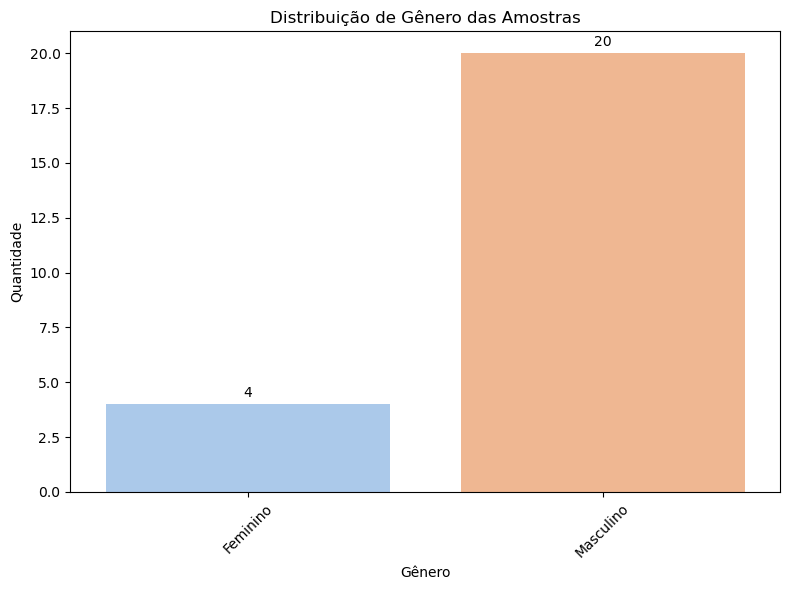

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=genero_df, x='genero', y='quantidade', palette='pastel')
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)
    
plt.title('Distribuição de Gênero das Amostras')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

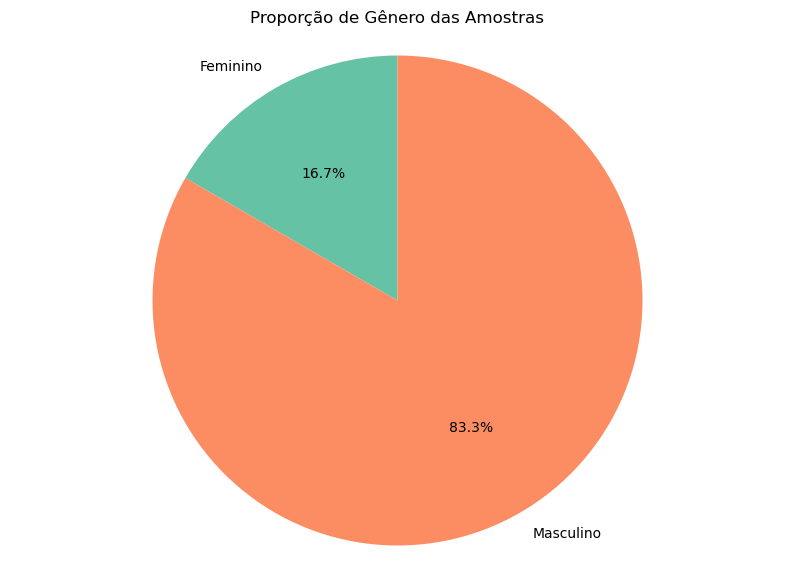

In [48]:
cor = sns.color_palette("Set2")
labels = genero_df['genero']
sizes = genero_df['proporcao']
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
plt.title('Proporção de Gênero das Amostras')
plt.axis('equal')
plt.show()

Logo, podemos concluir que nossas amostras são em sua grande maioria, são representações masculinas sobre a ansieade voltada as redes sociais.

## Distribuição das Idades

In [61]:
idade_df = dados.groupby('idade')['redes_mais_usada'].count().reset_index()
idade_df.rename(columns = {'redes_mais_usada': 'quantidade'}, inplace = True)
idade_df['proporcao'] = (idade_df['quantidade'] / dados.shape[0]) * 100
idade_df

,idade,quantidade,proporcao
0,19,2,8.333333
1,20,4,16.666667
2,21,7,29.166667
3,22,3,12.500000
4,23,4,16.666667
5,24,1,4.166667
6,25,1,4.166667
7,31,1,4.166667
8,54,1,4.166667


/tmp/ipykernel_4929/1304516763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=idade_df, x='idade', y='quantidade', palette='rocket')


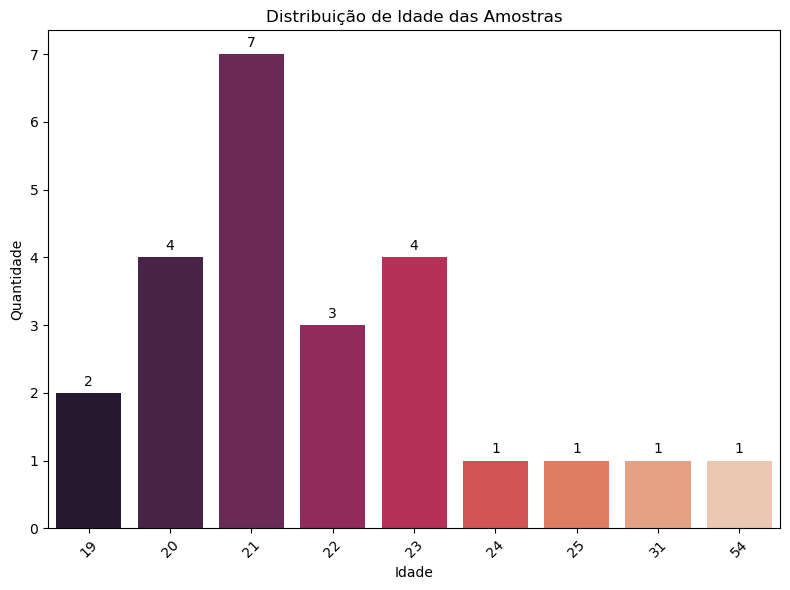

In [65]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=idade_df, x='idade', y='quantidade', palette='rocket')
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)
    
plt.title('Distribuição de Idade das Amostras')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

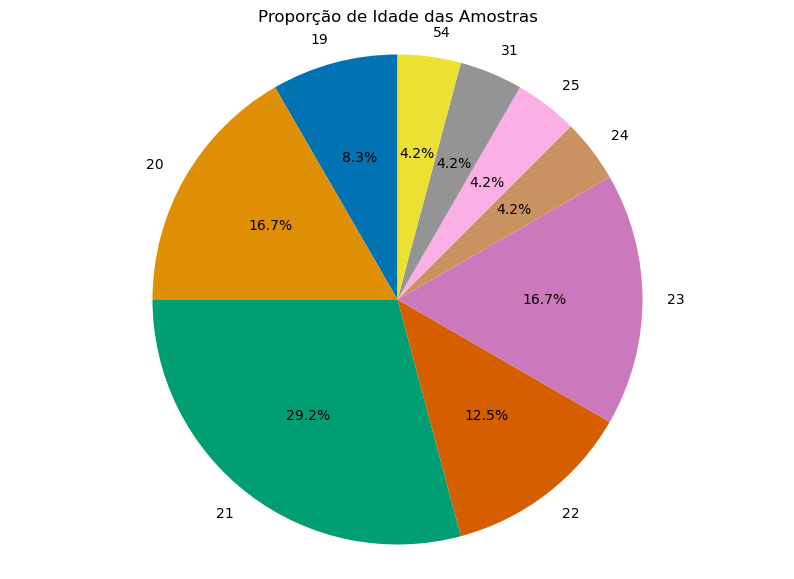

In [67]:
cor = sns.color_palette("colorblind")
labels = idade_df['idade']
sizes = idade_df['proporcao']
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
plt.title('Proporção de Idade das Amostras')
plt.axis('equal')
plt.show()

Com isso, podemos concluir que em nossas amostras, na maoria, foram votos de pessoas principalmente de pessoas com 21 anos de idade, representando 30% do total.

## Relação Idade e Gênero

Analisamos, separadamente, a distribuição de gênero e idade do nosso dataset. Agora, verificamos como que está disposta essa relação entre a variável quantitativa ordinal idade e a variável qualitativa nomiinal Gênero

In [70]:
idade_genero_df = dados.groupby(['genero', 'idade'])['redes_mais_usada'].count().reset_index()
idade_genero_df.rename(columns = {'redes_mais_usada': 'quantidade'}, inplace = True)
idade_genero_df

,genero,idade,quantidade
0,Feminino,19,1
1,Feminino,20,1
2,Feminino,23,1
3,Feminino,54,1
4,Masculino,19,1
5,Masculino,20,3
6,Masculino,21,7
7,Masculino,22,3
8,Masculino,23,3
9,Masculino,24,1


In [74]:
idade_feminino = idade_genero_df[idade_genero_df['genero'] == 'Feminino']
idade_feminino

,genero,idade,quantidade
0,Feminino,19,1
1,Feminino,20,1
2,Feminino,23,1
3,Feminino,54,1


Portanto, podemos concluir, que, com relação ao gênero feminino, não há nenhuma idade predominante nas amostras.

In [106]:
idade_masculino = idade_genero_df[idade_genero_df['genero'] == 'Masculino'].reset_index()
idade_masculino.drop(columns = ['index'], inplace = True)
idade_masculino


,genero,idade,quantidade
0,Masculino,19,1
1,Masculino,20,3
2,Masculino,21,7
3,Masculino,22,3
4,Masculino,23,3
5,Masculino,24,1
6,Masculino,25,1
7,Masculino,31,1


In [107]:
index = idade_masculino['quantidade'].idxmax()
idade_masculino.iloc[index]['idade']

21

Portanto, podemos concluir, que a idade masculina predominante nas amostras foi 21 anos, mostrando um foco na geração Z da sociedade, em convívio DIRETO com as redes socias, fator que será primordial para a análise futura.

## Variavel Quantidade Idade

Anteriormente, encontramos separadamente como está a distribuição das idades no csv e qual é a idade predominante para cada gênero. Agora, devemos encontrar as estatísticas descritivas da nossa variável quantidade idade, isto é, média, moda, mediana, max e min.

In [128]:
stats_idade = {
    'media': dados['idade'].mean(),
    'mediana': dados['idade'].median(),
    'moda': dados['idade'].mode()[0],
}
stats_idade_df = pd.DataFrame(list(stats_idade.items()), columns=['Estatística', 'Valor'])
stats_idade_df

,Estatística,Valor
0,media,23.208333
1,mediana,21.000000
2,moda,21.000000


Logo, podemos concluir que a variável quantitativa idade, possui uma média de 23 anos, uma mediana de 21 anos e a moda de 21 anos.

In [135]:
dados['iidade']

count    24.000000
mean     23.208333
std       7.002976
min      19.000000
25%      20.750000
50%      21.000000
75%      23.000000
max      54.000000
Name: idade, dtype: float64

Text(0, 0.5, 'Idade')

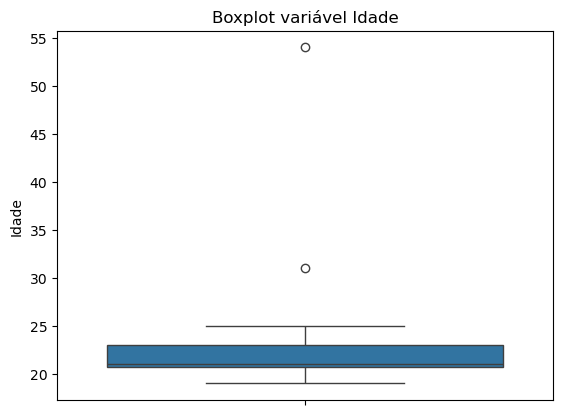

In [144]:
sns.boxplot(data = dados, y = 'idade')
plt.title('Boxplot variável Idade')
plt.ylabel('Idade')

Com a visualização do boxplot, podemos observar que possuimos alguns outliers em nosso dataset, fatores que afetam a média de idade (com valor de 23 anos), sendo que, na realidade, a distribuição dos dados está mais de focada entre 21 e 24 anos (O 2º quartil representa exatamente 21 anos). 

Logo, podemos concluir que a média não é uma boa representação para idade, pois é influenciada diretamente pelos outliiers. Como temos poucos dados, esses outliiers não serão retirados do dataset, visto que suas ausências afetariam nas manipulações das análises.

## Variável Qualitativa nominal redes_mais_usada

Tratando diretamente sobre redes sociais, temos as seguintes possibilidades em nosso dataset: <b>tiktok, instagram, twitter e facebook.</b>

### Rede Social predominante no DataSet

In [142]:
rede_predominante = dados.groupby('redes_mais_usada')['idade'].count().reset_index()
rede_predominante.rename(columns = {'idade': 'quantidade'}, inplace = True)
rede_predominante['proporcao'] = ( rede_predominante['quantidade'] / dados.shape[0] ) * 100
rede_predominante

,redes_mais_usada,quantidade,proporcao
0,Instagram,17,70.833333
1,TikTok,5,20.833333
2,Twitter,2,8.333333


Text(0, 0.5, 'Quantidade')

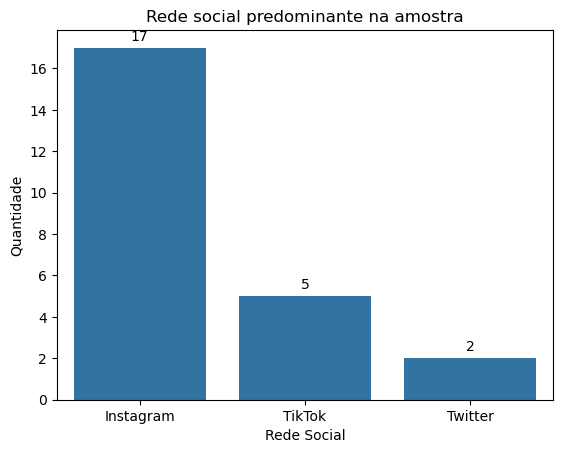

In [151]:
ax = sns.barplot(data = rede_predominante, x = 'redes_mais_usada', y = 'quantidade')
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)
plt.title('Rede social predominante na amostra')
plt.xlabel('Rede Social')
plt.ylabel('Quantidade')

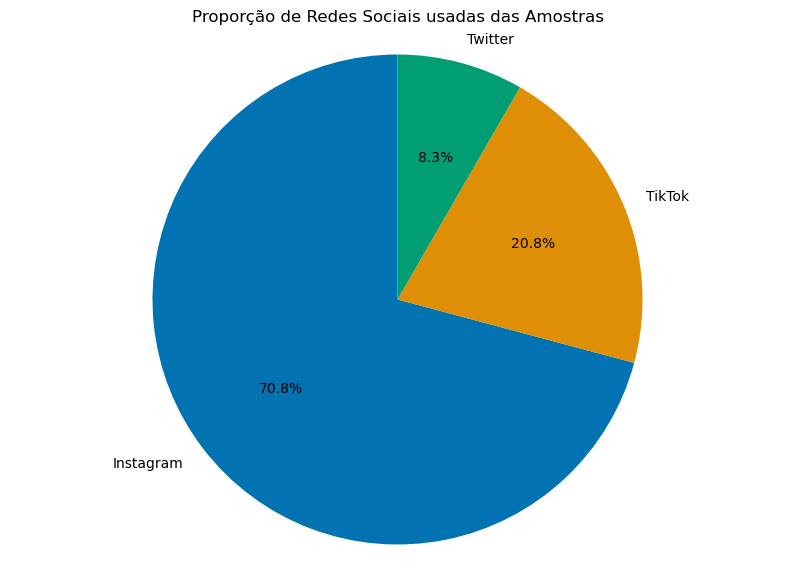

In [153]:
cor = sns.color_palette("colorblind")
labels = rede_predominante['redes_mais_usada']
sizes = rede_predominante['proporcao']
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
plt.title('Proporção de Redes Sociais usadas das Amostras')
plt.axis('equal')
plt.show()

Portanto, podemos concluir que o <b>Instagram</b> é a principal rede social utilizada pelos usuários na Amostra, representando mais de <b>70%</b> sobre o todo utilizado.

### Distribuição da Rede Social sobre o Gênero

In [159]:
rede_genero = dados.groupby(['genero', 'redes_mais_usada'])['idade'].count().reset_index()
rede_genero.rename(columns = {'idade': 'quantidade'}, inplace = True)
rede_genero

,genero,redes_mais_usada,quantidade
0,Feminino,Instagram,2
1,Feminino,TikTok,2
2,Masculino,Instagram,15
3,Masculino,TikTok,3
4,Masculino,Twitter,2


#### Feminino

In [160]:
rede_genero[rede_genero['genero'] == 'Feminino']

,genero,redes_mais_usada,quantidade
0,Feminino,Instagram,2
1,Feminino,TikTok,2


Portanto, podemos concluir que as redes sociais predominantes para o genero feminino (considerando somente as amostras do dataset obtido) são o <b>Instagram e Tik Tok</b>

#### Masculino

In [161]:
rede_genero[rede_genero['genero'] == 'Masculino']

,genero,redes_mais_usada,quantidade
2,Masculino,Instagram,15
3,Masculino,TikTok,3
4,Masculino,Twitter,2


Portanto, podemos concluir que as redes sociais predominantes para o genero masculino (considerando somente as amostras do dataset obtido) é o <b>Instagram</b>

### Variavel qualitativa ordinal frequencia_uso

A partir da rede social mais utilizada pelos usuários, temos uma variável qualitativa ordinal frequencia_uso que hierarquiza esse uso.

Os possíveis valores para frequencia_uso são: <b>Nunca, Raramente, Algumas Vezes na Semana e Todos os Dias </b>

In [168]:
rede_frequencia = dados.groupby('frequencia_uso')['idade'].count().reset_index()
rede_frequencia.rename(columns = {'idade': 'quantidade'}, inplace = True)
rede_frequencia['proporcao'] = (rede_frequencia['quantidade'] / dados.shape[0]) * 100
rede_frequencia

,frequencia_uso,quantidade,proporcao
0,Algumas vezes na semana,2,8.333333
1,Raramente,1,4.166667
2,Todos os dias,21,87.500000


Text(0, 0.5, 'Frequência')

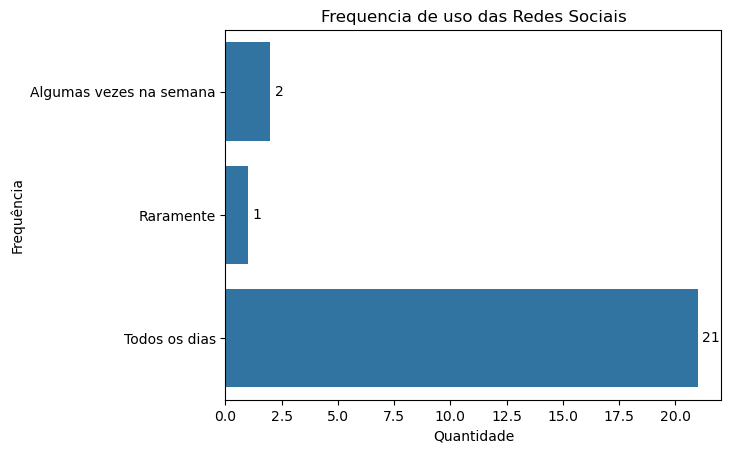

In [174]:
ax = sns.barplot(data = rede_frequencia, x = 'quantidade', y = 'frequencia_uso', orient = 'h')
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)
plt.title('Frequencia de uso das Redes Sociais')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')

Portanto, podemos concluir que a frequencia de uso para a grande maioria do dataset, representando uma proporcao de quase <b>90%</b> sobre o todo, é a utilização de redes sociais <b>todos os dias</b>.

### Relação Rede Social e Frequência uso

In [170]:
relacao_rede_frequencia = dados.groupby(['redes_mais_usada', 'frequencia_uso'])['idade'].count().reset_index()
relacao_rede_frequencia.rename(columns = {'idade': 'quantidade'}, inplace = True)
relacao_rede_frequencia

,redes_mais_usada,frequencia_uso,quantidade
0,Instagram,Algumas vezes na semana,2
1,Instagram,Raramente,1
2,Instagram,Todos os dias,14
3,TikTok,Todos os dias,5
4,Twitter,Todos os dias,2


In [177]:
relacao_rede_frequencia[relacao_rede_frequencia['redes_mais_usada'] == 'Instagram']

,redes_mais_usada,frequencia_uso,quantidade
0,Instagram,Algumas vezes na semana,2
1,Instagram,Raramente,1
2,Instagram,Todos os dias,14


In [178]:
relacao_rede_frequencia[relacao_rede_frequencia['redes_mais_usada'] == 'Instagram']['quantidade'].max()

14

Portanto, para a rede social mais utilizada no dataset, o <b>Instagram</b>, sua frequẽncia de uso predominante é <b>Todos os Dias</b>.

### Variável quantidade media_uso

Agora, trataremos sobre a variavel quantidade media_uso, que expressa em valores médio o consumo diário do consumo de redes sociais.

<Axes: ylabel='media_uso'>

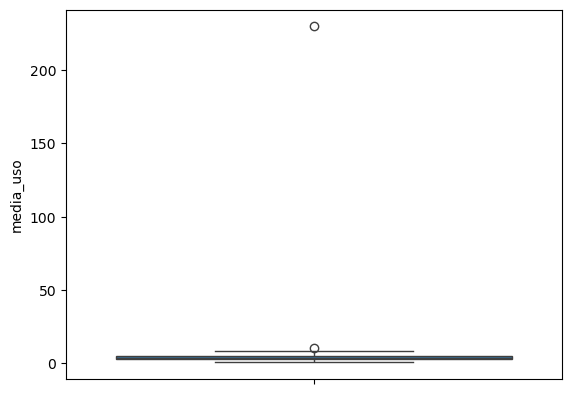

In [182]:
sns.boxplot(data = dados['media_uso'])

A partir do boxplot, podemos analisar que temos um valor extremamente inconsistente em nosso dataset, muito provavelmente inserido erroneamento pelo usuário. Logo, para não possuir, um outlier afetando extremamente a media_uso faremos sua substituicao pela moda. 

In [186]:
dados['media_uso']

0       2.0
1     230.0
2       2.5
3       3.0
4       3.0
5       4.0
6       2.0
7       5.0
8       8.0
9       4.0
10      4.0
11      4.0
12      4.0
13      3.0
14      3.0
15      5.0
16     10.0
17      1.0
18      2.0
19      5.0
20      5.0
21      0.5
22      3.0
23      3.0
Name: media_uso, dtype: float64

Com relação ao valor 10, apesar de ser um valor alto, ainda há de ser consistente, visto que de fato há usuários que passam 10 horas por dia nas redes sociais

In [188]:
dados['media_uso'].iloc[1] = dados['media_uso'].mode()[0]

/tmp/ipykernel_4929/4074891910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['media_uso'].iloc[1] = dados['media_uso'].mode()[0]


In [190]:
stats_media_uso = {
    'media': dados['media_uso'].mean(),
    'mediana': dados['media_uso'].median(),
    'moda': dados['media_uso'].mode()[0],
}
stats_media_uso = pd.DataFrame(list(stats_media_uso.items()), columns=['Estatística', 'Valor'])
stats_media_uso

,Estatística,Valor
0,media,3.708333
1,mediana,3.000000
2,moda,3.000000


Portanto, podemos concluir que media_uso tem uma media de 3.7h/dia, mediana de 3h/dia e moda de 3h/dia.

<Axes: ylabel='media_uso'>

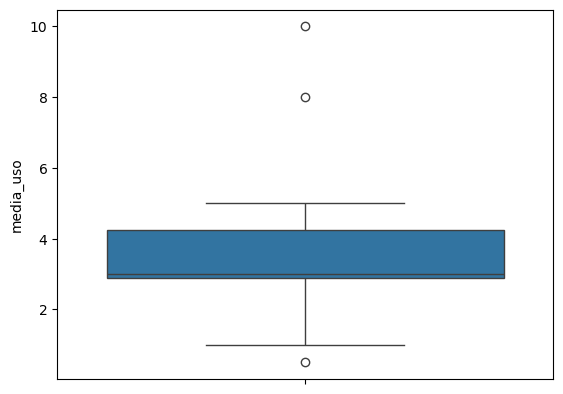

In [203]:
sns.boxplot(data = dados['media_uso'])

#### Relação media_uso com Rede Social predominante (Instagram)

Após a transformação do outlier extremamente inconsistente, a distribuição dos dados media_uso ficou mais consistente, ainda com a presença de outliers, porém, mais próximo do real.

In [195]:
redes_uso = dados.groupby(['redes_mais_usada', 'media_uso'])['idade'].count().reset_index()
redes_uso.rename(columns = {'idade': 'quantidade'}, inplace = True)
redes_uso

,redes_mais_usada,media_uso,quantidade
0,Instagram,0.5,1
1,Instagram,1.0,1
2,Instagram,2.0,3
3,Instagram,3.0,5
4,Instagram,4.0,4
5,Instagram,5.0,2
6,Instagram,8.0,1
7,TikTok,2.5,1
8,TikTok,3.0,2
9,TikTok,5.0,1


In [198]:
redes_uso[redes_uso['redes_mais_usada'] == 'Instagram']

,redes_mais_usada,media_uso,quantidade
0,Instagram,0.5,1
1,Instagram,1.0,1
2,Instagram,2.0,3
3,Instagram,3.0,5
4,Instagram,4.0,4
5,Instagram,5.0,2
6,Instagram,8.0,1


/tmp/ipykernel_4929/709622296.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = redes_uso[redes_uso['redes_mais_usada'] == 'Instagram'], x = 'quantidade', y = 'media_uso', orient = 'h', palette='Blues_d')


Text(0, 0.5, 'Horas')

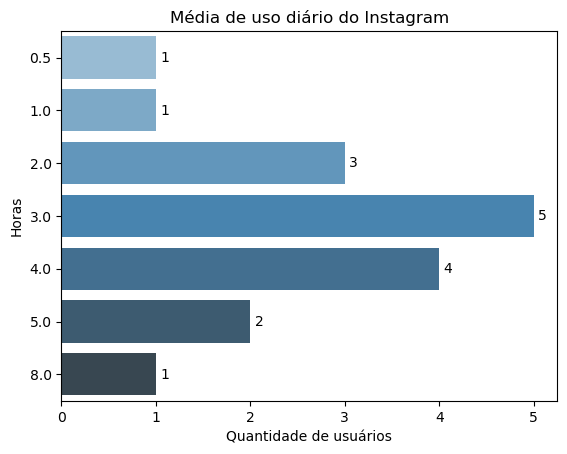

In [201]:
ax = sns.barplot(data = redes_uso[redes_uso['redes_mais_usada'] == 'Instagram'], x = 'quantidade', y = 'media_uso', orient = 'h', palette='Blues_d')
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)
plt.title('Média de uso diário do Instagram')
plt.xlabel('Quantidade de usuários')
plt.ylabel('Horas')

Com isso, podemos concluir que, a média de uso diário da rede social predominante <b>Instagram</b> vale <b>5h/dia.</b>

### Variável qualitativa nominal razao_uso_rede

Iremos tratar especificamente do razao_uso_rede para a rede predominante do dataset, isto é, o <b>Instagram</b>.

A varíavel razao_uso_rede é uma variável qualitativa nominal pois não possui uma hierarquia e pode ter os seguintes valores: <b>Entreterimento, Manter contato com amigos e familiares, Acompanhar notícias e eventos, buscar informações profissionais e Outro</b>

In [205]:
razao_uso_instagram = dados.groupby(['redes_mais_usada','razao_uso_rede'])['idade'].count().reset_index()
razao_uso_instagram.rename(columns = {'idade' : 'quantidade'}, inplace = True)
razao_uso_instagram

,redes_mais_usada,razao_uso_rede,quantidade
0,Instagram,Acompanhar notícias e eventos,3
1,Instagram,Entretenimento,11
2,Instagram,Manter contato com amigos e familiares,3
3,TikTok,Entretenimento,5
4,Twitter,Entretenimento,1
5,Twitter,Manter contato com amigos e familiares,1


/tmp/ipykernel_4929/3552709418.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = razao_uso_instagram[razao_uso_instagram['redes_mais_usada'] == 'Instagram'], x = 'quantidade', y = 'razao_uso_rede', orient = 'h', palette='pastel')


Text(0, 0.5, 'Razão para Uso')

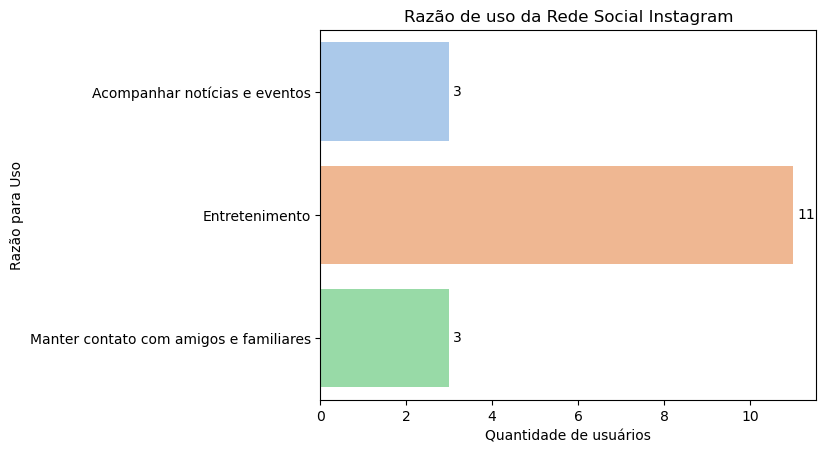

In [210]:
ax = sns.barplot(data = razao_uso_instagram[razao_uso_instagram['redes_mais_usada'] == 'Instagram'], x = 'quantidade', y = 'razao_uso_rede', orient = 'h', palette='pastel')
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)
plt.title('Razão de uso da Rede Social Instagram')
plt.xlabel('Quantidade de usuários')
plt.ylabel('Razão para Uso')

Podemos concluir, que para a rede predominante Instragram, a maior razao para uso é o <b>Entreterimento</b>.

### Variável qualitativa ordinal ansiedade_conteudo

Agora, trataremos exclusivamente se a utilização das redes sociais traz ansiedade aos seus usuários.

A variável qualitativa ordinal ansiedade_conteudo pode possuir os seguintes valores: <b>Nunca, Raramente, Às vezes, Frequentemente, Sempre</b>

Por se tratar de uma variável qualitativa ordinal, será definido que os valores <b>raramente, as vezes, frequentemente, sempre</b> trazem ansiedade aos usuários

In [217]:
def define_ansiedade(df, coluna_frequencia):
    df['ansiedade'] = df[coluna_frequencia].apply(lambda x: 0 if str(x).strip().lower() == 'raramente' else 1)
    return df
dados = define_ansiedade(dados, 'ansiedade_conteudo')

In [220]:
ansiedade = dados.groupby('ansiedade')['idade'].count().reset_index()
ansiedade.rename(columns = {'idade': 'quantidade'}, inplace = True)
ansiedade['proporcao'] = (ansiedade['quantidade'] / dados.shape[0]) * 100
ansiedade

,ansiedade,quantidade,proporcao
0,0,11,45.833333
1,1,13,54.166667


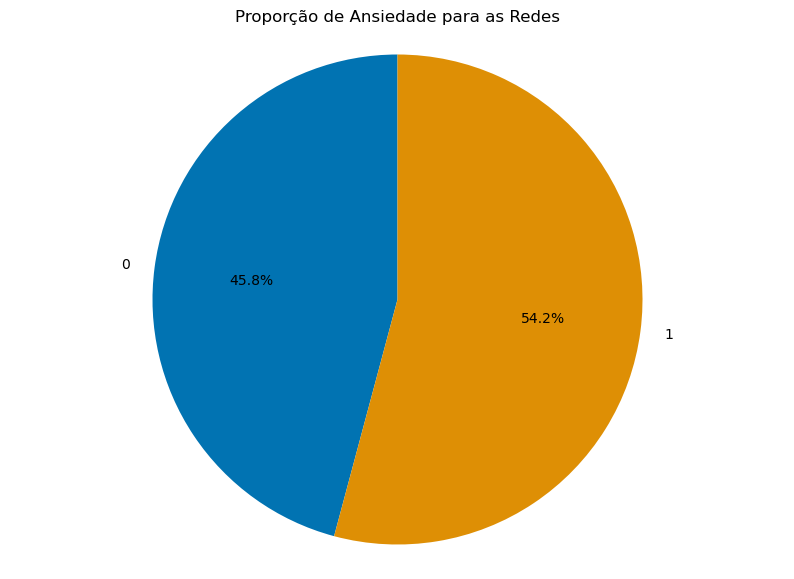

In [224]:
cor = sns.color_palette("colorblind")
labels = ansiedade['ansiedade']
sizes = ansiedade['proporcao']
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
plt.title('Proporção de Ansiedade para as Redes')
plt.axis('equal')
plt.show()

Portanto, podemos concluir, que mais da metade dos usuários possuem <b>ansiedade</b> com a utilização de <b>redes sociais</b>

### Variável qualitativa nominal comparacao_rede

Tratando no contexto da ansiedade com o uso de redes sociais, a variável qualitativa nominal comparacao_rede trata se o usuário já se comparou negativamente por causa das redes

In [228]:
comparacao_ansiedade = dados.groupby(['ansiedade', 'comparacao_rede'])['idade'].count().reset_index()
comparacao_ansiedade.rename(columns = {'idade': 'quantidade'},inplace = True)
comparacao_ansiedade

,ansiedade,comparacao_rede,quantidade
0,0,Não,5
1,0,Sim,6
2,1,Não,6
3,1,Sim,7


Portanto, podemos concluir que grande a maioria dos usuários que possuem <b>ansiedade</b> já se <b>compararam negativamente por causa das redes sociais</b>

### impacto_redes_saude_mental

Ainda tratando no contexto da ansiedade, a variável qualitativa ordinal impacto_redes_mental varia de <b>0 a 10</b>, indicando o quanto as redes sociais impactam a saúde mental.

Por se tratar de uma qualitativa ordinal, será definido que de 0-4 não impacta saude mental e 5-10 impacta.

In [234]:
def define_impacto_saude_mental(df, coluna_frequencia):
    df['impacta_saude_mental'] = df[coluna_frequencia].apply(
        lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 5 else 0
    )
    return df
dados = define_impacto_saude_mental(dados, 'impacto_redes_saude_mental')
dados

,data,idade,genero,frequencia_uso,media_uso,redes_mais_usada,ansiedade_conteudo,comparacao_rede,impacto_redes_saude_mental,razao_uso_rede,ansiedade,impacta_saude_mental
0,2025/05/02 3:09:52 PM GMT-3,20,Masculino,Todos os dias,2.0,Instagram,Nunca,Sim,0,Entretenimento,1,0
1,2025/05/02 3:10:29 PM GMT-3,24,Masculino,Todos os dias,3.0,Instagram,Raramente,Não,1,Manter contato com amigos e familiares,0,0
2,2025/05/02 3:10:48 PM GMT-3,21,Masculino,Todos os dias,2.5,TikTok,Frequentemente,Não,3,Entretenimento,1,0
3,2025/05/02 3:15:01 PM GMT-3,20,Feminino,Todos os dias,3.0,Instagram,Às vezes,Sim,6,Acompanhar notícias e eventos,1,1
4,2025/05/02 3:15:18 PM GMT-3,25,Masculino,Todos os dias,3.0,Instagram,Raramente,Não,5,Entretenimento,0,1
5,2025/05/02 3:52:03 PM GMT-3,21,Masculino,Todos os dias,4.0,Twitter,Raramente,Sim,3,Entretenimento,0,0
6,2025/05/02 6:37:24 PM GMT-3,22,Masculino,Todos os dias,2.0,Instagram,Nunca,Não,2,Acompanhar notícias e eventos,1,0
7,2025/05/03 11:02:29 AM GMT-3,21,Masculino,Todos os dias,5.0,TikTok,Frequentemente,Sim,10,Entretenimento,1,1
8,2025/05/03 11:06:03 AM GMT-3,54,Feminino,Todos os dias,8.0,Instagram,Sempre,Sim,10,Entretenimento,1,1
9,2025/05/03 11:14:48 AM GMT-3,31,Masculino,Algumas vezes na semana,4.0,Instagram,Frequentemente,Sim,7,Entretenimento,1,1


In [237]:
impacta_saude_mental = dados.groupby('impacta_saude_mental')['idade'].count().reset_index()
impacta_saude_mental.rename(columns = {'idade': 'quantidade'},inplace = True)
impacta_saude_mental['proporcao'] = (impacta_saude_mental['quantidade'] / dados.shape[0] ) * 100
impacta_saude_mental

,impacta_saude_mental,quantidade,proporcao
0,0,8,33.333333
1,1,16,66.666667


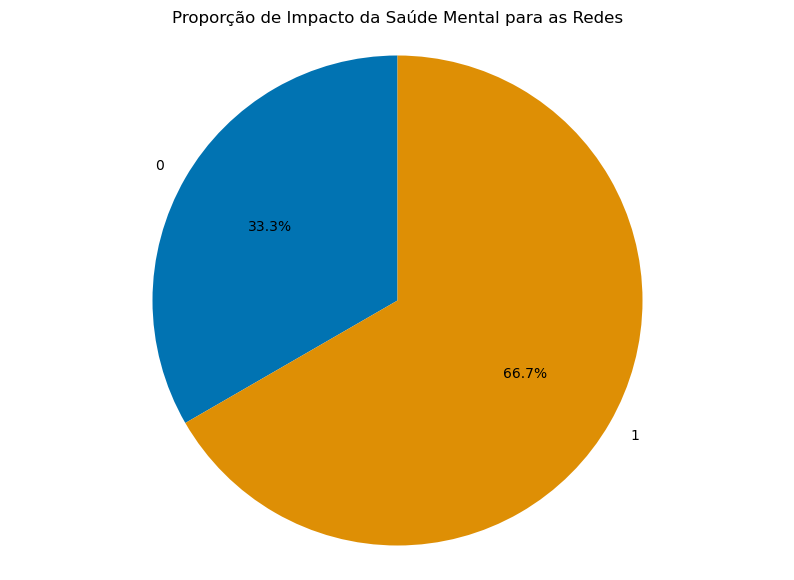

In [238]:
cor = sns.color_palette("colorblind")
labels = impacta_saude_mental['impacta_saude_mental']
sizes = impacta_saude_mental['proporcao']
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
plt.title('Proporção de Impacto da Saúde Mental para as Redes')
plt.axis('equal')
plt.show()

Portanto, podemos concluir que a maioria dos usuários acredita que a saúde mental é <b>impactada</b> pelo uso das redes sociais.

### relacao ansiedade x impacto saude mental

In [244]:
ansiedade_saude = dados.groupby(['ansiedade', 'impacta_saude_mental'])['idade'].count().reset_index()
ansiedade_saude.rename(columns = {'idade': 'quantidade'},inplace = True)
ansiedade_saude

,ansiedade,impacta_saude_mental,quantidade
0,0,0,3
1,0,1,8
2,1,0,5
3,1,1,8


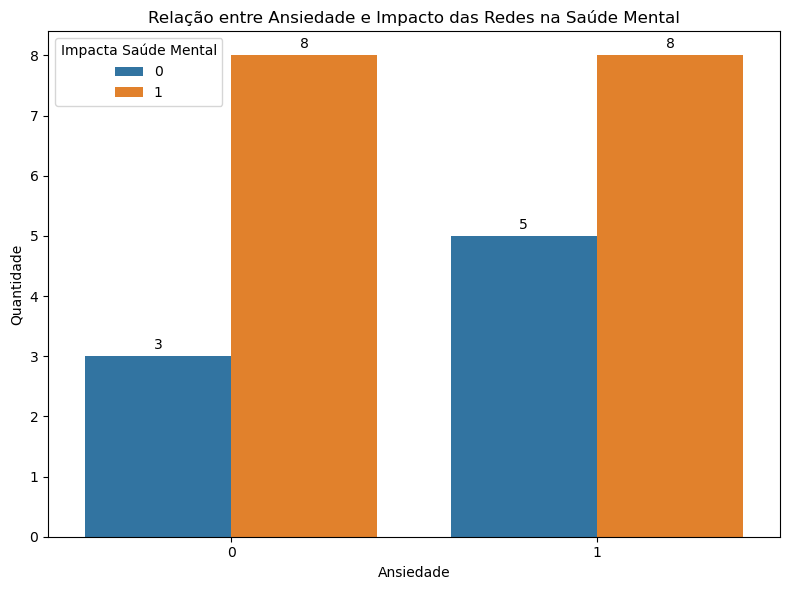

In [256]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=ansiedade_saude,
    x='ansiedade',
    y='quantidade',
    hue='impacta_saude_mental',
)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.xlabel("Ansiedade")
plt.ylabel("Quantidade")
plt.title("Relação entre Ansiedade e Impacto das Redes na Saúde Mental")
plt.legend(title="Impacta Saúde Mental", loc='upper left')
plt.tight_layout()
plt.show()

Portanto, podemos concluir que a maioria dos usuário que sofrem <b>ansiedade</b>, acreditam que o consumo das redes <b>impacta</b> a saude mental.

### Relacao ansiedade x comparacao x impacto_saude_mental

In [245]:
comparacao_ansiedade_saude = dados.groupby(['ansiedade', 'impacta_saude_mental', 'comparacao_rede'])['idade'].count().reset_index()
comparacao_ansiedade_saude.rename(columns = {'idade': 'quantidade'},inplace = True)
comparacao_ansiedade_saude

,ansiedade,impacta_saude_mental,comparacao_rede,quantidade
0,0,0,Não,1
1,0,0,Sim,2
2,0,1,Não,4
3,0,1,Sim,4
4,1,0,Não,4
5,1,0,Sim,1
6,1,1,Não,2
7,1,1,Sim,6


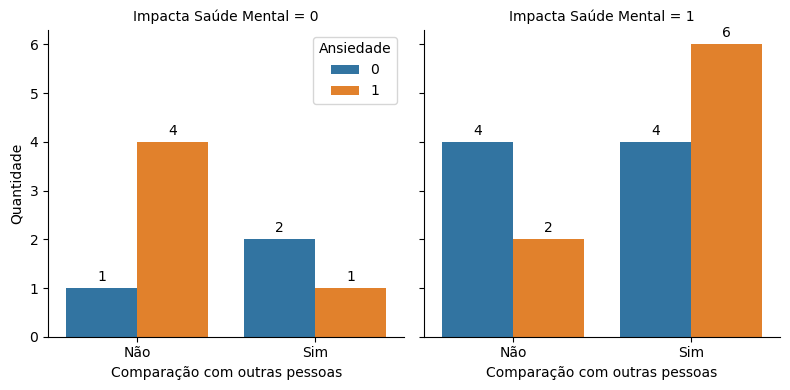

In [258]:
g = sns.catplot(
    data=comparacao_ansiedade_saude,
    kind='bar',
    x='comparacao_rede',
    y='quantidade',
    hue='ansiedade',
    col='impacta_saude_mental',
    height=4,
    aspect=1,
    legend_out=False 
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

g.set_axis_labels("Comparação com outras pessoas", "Quantidade")
g.set_titles("Impacta Saúde Mental = {col_name}")
g._legend.set_title("Ansiedade")

plt.tight_layout()
plt.show()

Portanto, podemos concluir que a maior parte dos usuários que sofrem ansiedade, já se compararam negativamente devido ao uso das redes e acreditam que elas impactam a respectiva saúde mental.

# Preparação para Análises Inferencias

In [265]:
from scipy.stats import shapiro

Antes de aplicarmos os testes de hiṕoteses sobre nossas amostras, precisamos verificar se nossas variáveis quantitativas seguem distribuições normais, pré-requisito exigido para aplicação de testes paramétricos. Sua escolha de utilização é baseada na maior vericidade que os testes paramétricos trazem em relação aos não paramétricos.

## Quantitativas media_uso e idade

#### media_uso

<Axes: xlabel='media_uso', ylabel='Count'>

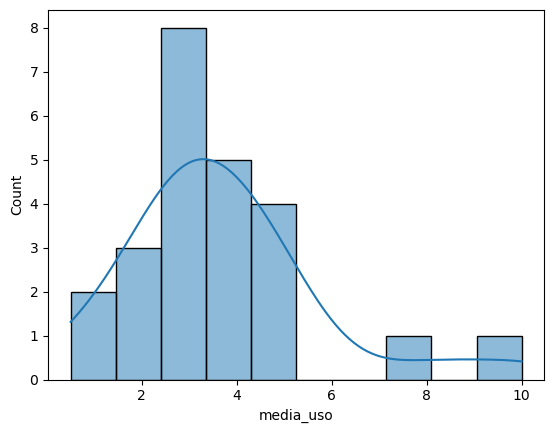

In [264]:
sns.histplot(dados['media_uso'], kde=True)

In [267]:
stat, p = shapiro(dados['media_uso'].dropna())
print(f"p-valor: {p}")
if p > 0.05:
    print("Distribuição segue uma Normal.")
else:
    print("Distribuição não segue uma Normal.")

p-valor: 0.005087281071925485
Distribuição não segue uma Normal.


Inicialmente, a distribuição de media_uso <b>não segue uma Normal</b> em virtude dos outliers ainda presentes na distribuição. Com isso, o maior outlier será substituído pela moda da distribuição para que ela consiga <b>seguir uma normal</b>. 

In [ ]:
dados['media_uso']

In [269]:
dados['media_uso'].iloc[16] = dados['media_uso'].mode()[0]

/tmp/ipykernel_4929/32605290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['media_uso'].iloc[16] = dados['media_uso'].mode()[0]


In [271]:
dados['media_uso']

0     2.0
1     3.0
2     2.5
3     3.0
4     3.0
5     4.0
6     2.0
7     5.0
8     8.0
9     4.0
10    4.0
11    4.0
12    4.0
13    3.0
14    3.0
15    5.0
16    3.0
17    1.0
18    2.0
19    5.0
20    5.0
21    0.5
22    3.0
23    3.0
Name: media_uso, dtype: float64

<Axes: xlabel='media_uso', ylabel='Count'>

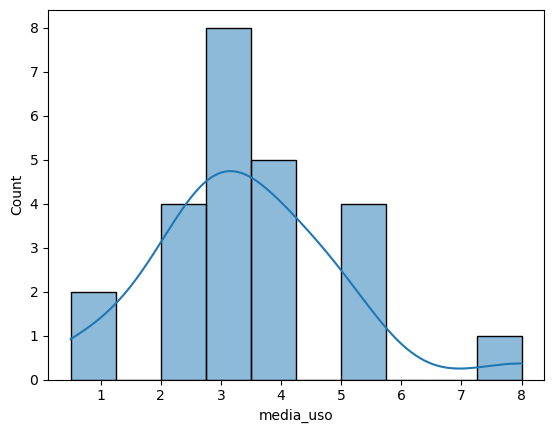

In [273]:
sns.histplot(dados['media_uso'], kde=True)

In [272]:
stat, p = shapiro(dados['media_uso'])
print(f"p-valor: {p}")
if p > 0.05:
    print("Distribuição segue uma Normal.")
else:
    print("Distribuição não segue uma Normal.")

p-valor: 0.06201492648302959
Distribuição segue uma Normal.


Agora, a distrbuição de media_uso segue uma <b>distribuição normal</b>, estando apto para testes paramétricos.

#### idade

<Axes: xlabel='idade', ylabel='Count'>

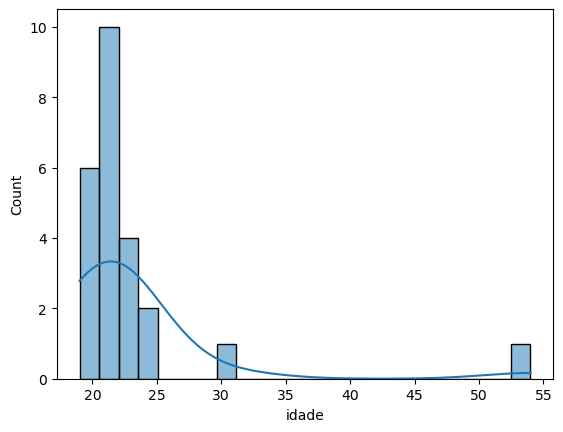

In [275]:
sns.histplot(dados['idade'], kde=True)

In [276]:
stat, p = shapiro(dados['idade'])
print(f"p-valor: {p}")
if p > 0.05:
    print("Distribuição segue uma Normal.")
else:
    print("Distribuição não segue uma Normal.")

p-valor: 3.283701579381655e-08
Distribuição não segue uma Normal.


Inicialmente, a distribuição de idade <b>não segue uma Normal</b> em virtude dos outliers ainda presentes na distribuição. Com isso, o maior outlier será substituído pela moda da distribuição para que ela consiga <b>seguir uma normal</b>. 

In [277]:
dados['idade']

0     20
1     24
2     21
3     20
4     25
5     21
6     22
7     21
8     54
9     31
10    23
11    23
12    22
13    21
14    21
15    23
16    19
17    19
18    21
19    20
20    22
21    20
22    21
23    23
Name: idade, dtype: int64

In [278]:
dados['idade'].iloc[8] = dados['idade'].mode()[0]

/tmp/ipykernel_4929/2869707841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['idade'].iloc[8] = dados['idade'].mode()[0]


In [282]:
dados['idade'].iloc[9] = dados['idade'].mode()[0]

/tmp/ipykernel_4929/2564783484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['idade'].iloc[9] = dados['idade'].mode()[0]


In [283]:
dados['idade']

0     20
1     24
2     21
3     20
4     25
5     21
6     22
7     21
8     21
9     21
10    23
11    23
12    22
13    21
14    21
15    23
16    19
17    19
18    21
19    20
20    22
21    20
22    21
23    23
Name: idade, dtype: int64

<Axes: xlabel='idade', ylabel='Count'>

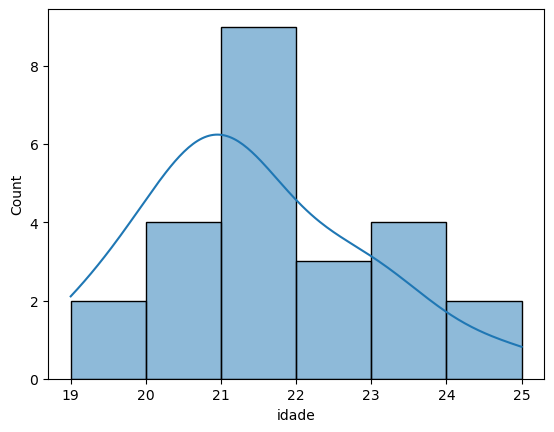

In [284]:
sns.histplot(dados['idade'], kde=True)

In [285]:
stat, p = shapiro(dados['idade'])
print(f"p-valor: {p}")
if p > 0.05:
    print("Distribuição segue uma Normal.")
else:
    print("Distribuição não segue uma Normal.")

p-valor: 0.11345450167309146
Distribuição segue uma Normal.


Agora, a distribuição segue uma normal, estando apta para receber testes paramétricos, podendo iniciar a parte de análises inferenciais.

# Análises Inferenciais

In [334]:
import itertools
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

## Correlação entre as variáveis quantitativas com Ansiedade

In [290]:
dados.drop(columns = ['data'], inplace = True)
dados

KeyError: "['data'] not found in axis"

In [298]:
frequencia_mapping = {
    'Nunca': 1,
    'Raramente': 2,
    'Algumas vezes na semana': 3,
    'Todos os dias': 4,
}

comparacao_mapping = {
    'Não': 0,
    'Sim': 1
}

genero_mapping = {
    'Feminino': 0,
    'Masculino': 1
}


dados['frequencia_uso_cat'] = dados['frequencia_uso'].map(frequencia_mapping)
dados['comparacao_rede_cat'] = dados['comparacao_rede'].map(comparacao_mapping)
dados['genero_cat'] = dados['genero'].map(genero_mapping)

In [300]:
dados[['genero_cat', 'frequencia_uso_cat', 'idade', 'media_uso', 'comparacao_rede_cat', 'ansiedade', 'impacta_saude_mental']]

,genero_cat,frequencia_uso_cat,idade,media_uso,comparacao_rede_cat,ansiedade,impacta_saude_mental
0,1,4,20,2.0,1,1,0
1,1,4,24,3.0,0,0,0
2,1,4,21,2.5,0,1,0
3,0,4,20,3.0,1,1,1
4,1,4,25,3.0,0,0,1
5,1,4,21,4.0,1,0,0
6,1,4,22,2.0,0,1,0
7,1,4,21,5.0,1,1,1
8,0,4,21,8.0,1,1,1
9,1,3,21,4.0,1,1,1


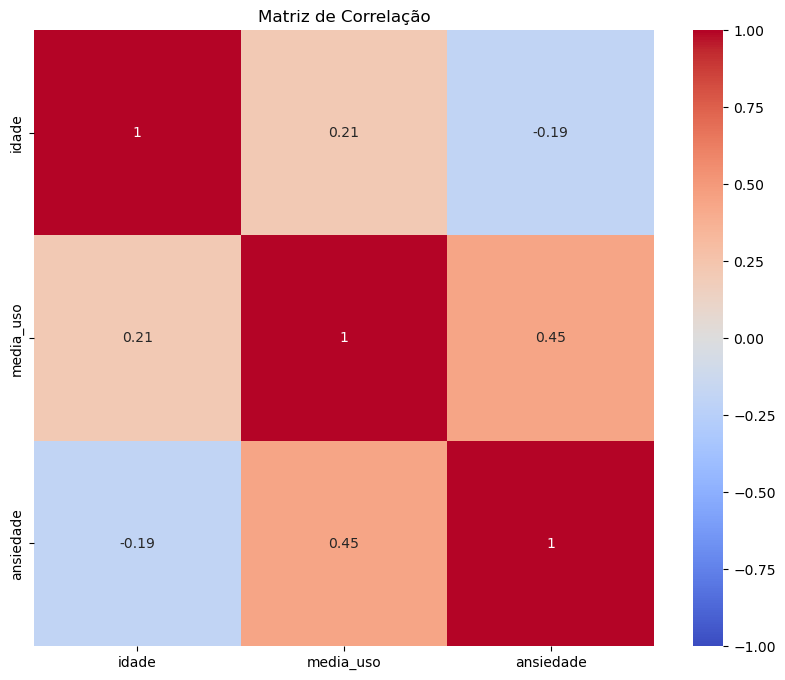

In [314]:
variaveis = ['idade', 'media_uso', 'ansiedade']

# Cálculo da matriz de correlação (Pearson)
matriz_corr = dados[variaveis].corr()

# Plot do heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

### Teste qui-quadrado: Verificar se as variáveis categóricas estão associadas

In [311]:
categorical_columns = ['genero_cat', 'frequencia_uso_cat', 'comparacao_rede_cat', 'ansiedade', 'impacta_saude_mental']
combinations = itertools.combinations(categorical_columns, 2)
for var1, var2 in combinations:
    print(f"Teste entre '{var1}' e '{var2}':")
    contingency_table = pd.crosstab(dados[var1], dados[var2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print("P-valor:", p)
    if p < 0.05:
        print("As variáveis estão associadas.")
    else:
        print("Não há associação entre as variáveis.")
    
    print("-" * 20)

Teste entre 'genero_cat' e 'frequencia_uso_cat':
P-valor: 0.7097395956891256
Não há associação entre as variáveis.
--------------------
Teste entre 'genero_cat' e 'comparacao_rede_cat':
P-valor: 0.1427323345972251
Não há associação entre as variáveis.
--------------------
Teste entre 'genero_cat' e 'ansiedade':
P-valor: 0.7140495419743069
Não há associação entre as variáveis.
--------------------
Teste entre 'genero_cat' e 'impacta_saude_mental':
P-valor: 0.33292160806556315
Não há associação entre as variáveis.
--------------------
Teste entre 'frequencia_uso_cat' e 'comparacao_rede_cat':
P-valor: 0.6417500100590743
Não há associação entre as variáveis.
--------------------
Teste entre 'frequencia_uso_cat' e 'ansiedade':
P-valor: 0.5297422903231036
Não há associação entre as variáveis.
--------------------
Teste entre 'frequencia_uso_cat' e 'impacta_saude_mental':
P-valor: 0.4243728456769499
Não há associação entre as variáveis.
--------------------
Teste entre 'comparacao_rede_cat' e

Portanto, podemos concluir que não há nenhuma associação entre as variáveis categóricas.

### T-Test: Verificar se quem tem ansiedade tem maior tempo de uso das redes sociais.

In [320]:
grupo_ansiedade = dados[dados['ansiedade'] == 1]['media_uso']
grupo_sem_ansiedade = dados[dados['ansiedade'] == 0]['media_uso']

media_com_ansiedade = grupo_ansiedade.mean()
media_sem_ansiedade = grupo_sem_ansiedade.mean()

print("Média com ansiedade:", media_com_ansiedade)
print("Média sem ansiedade:", media_sem_ansiedade)

t_stat, p_value = ttest_ind(grupo_ansiedade, grupo_sem_ansiedade)

print("p-valor:", p_value)
if p_value < 0.05:
    print("Há diferença significativa no tempo de uso entre grupos com e sem ansiedade.")
else:
    print("Não há diferença significativa.")

Média com ansiedade: 4.038461538461538
Média sem ansiedade: 2.6818181818181817
p-valor: 0.029261586902240438
Há diferença significativa no tempo de uso entre grupos com e sem ansiedade.


Portanto, através do teste de hipótese, conseguimos concluir que, quem tem mais ansiedade passa mais tempo nas redes sociais.

### T-Test: Verificar se quem tem ansiedade tem alguma diferença com a idade.

In [328]:
idade_com_ansiedade = dados[dados['ansiedade'] == 1]['idade']
idade_sem_ansiedade = dados[dados['ansiedade'] == 0]['idade']


t_stat, p_value = ttest_ind(idade_com_ansiedade, idade_sem_ansiedade)


print("Média de idade com ansiedade:", idade_com_ansiedade.mean())
print("Média de idade sem ansiedade:", idade_sem_ansiedade.mean())

print("p-valor:", p_value)

if p_value < 0.05:
    print("Há diferença estatisticamente significante na idade entre os grupos.")
else:
    print("Não há diferença estatisticamente significante.")

Média de idade com ansiedade: 21.153846153846153
Média de idade sem ansiedade: 21.727272727272727
p-valor: 0.36264752929570565
Não há diferença estatisticamente significante.


Portanto, através do teste de hipótese, conseguimos concluir que não há uma diferença estatisticamente significante para a ansiedade com relacao a idade.

### T-Test: Verificar se há diferença no impacto na saúde mental entre os diferentes níveis de frequência de uso das redes sociais.

In [331]:
grupo_baixa_frequencia = dados[dados['frequencia_uso_cat'].isin([1, 2])]['impacta_saude_mental']
grupo_alta_frequencia = dados[dados['frequencia_uso_cat'].isin([3, 4])]['impacta_saude_mental']

t_stat, p_value = ttest_ind(grupo_baixa_frequencia, grupo_alta_frequencia)

print(f"P-valor: {p_value}")

# Interpretação
if p_value < 0.05:
    print("Há uma diferença significativa no impacto na saúde mental entre os grupos de baixa e alta frequência de uso.")
else:
    print("Não há uma diferença significativa no impacto na saúde mental entre os grupos de baixa e alta frequência de uso.")

P-valor: 0.49175030016965904
Não há uma diferença significativa no impacto na saúde mental entre os grupos de baixa e alta frequência de uso.


### T-Test: Verificar se as pessoas que relatam maior impacto na saúde mental tendem a passar mais tempo nas redes sociais.

In [342]:
grupo_impacto_0 = dados[dados['impacta_saude_mental'] == 0]['media_uso']
grupo_impacto_1 = dados[dados['impacta_saude_mental'] == 1]['media_uso']

t_stat, p_value = ttest_ind(grupo_impacto_0, grupo_impacto_1, nan_policy='omit')

print(f" P-valor: {p_value}")
if p_value < 0.05:
    print("Há uma diferença significativa no tempo de uso das redes sociais entre pessoas com diferentes níveis de impacto na saúde mental.")
else:
    print("Não há diferença significativa no tempo de uso das redes sociais entre pessoas com diferentes níveis de impacto na saúde mental.")


 P-valor: 0.619658942923358
Não há diferença significativa no tempo de uso das redes sociais entre pessoas com diferentes níveis de impacto na saúde mental.


### T-Test: Verificar se há uma diferença significativa no impacto na saúde mental entre as pessoas que se comparam nas redes sociais.

In [343]:
grupo_comparacao_0 = dados[dados['comparacao_rede_cat'] == 0]['impacta_saude_mental']
grupo_comparacao_1 = dados[dados['comparacao_rede_cat'] == 1]['impacta_saude_mental']

t_stat, p_value = ttest_ind(grupo_comparacao_0, grupo_comparacao_1, nan_policy='omit')

print(f" P-valor: {p_value}")
if p_value < 0.05:
    print("Há uma diferença significativa no impacto na saúde mental entre os grupos de comparação com os outros.")
else:
    print("Não há diferença significativa no impacto na saúde mental entre os grupos de comparação com os outros.")

 P-valor: 0.26581359599987997
Não há diferença significativa no impacto na saúde mental entre os grupos de comparação com os outros.


### T-Test: Verificar se o nível de impacto na saúde mental difere entre pessoas com e sem ansiedade.

In [346]:
grupo_ansiedade_0 = dados[dados['ansiedade'] == 0]['impacta_saude_mental']
grupo_ansiedade_1 = dados[dados['ansiedade'] == 1]['impacta_saude_mental']

# Realizar o Teste t de Student
t_stat, p_value = ttest_ind(grupo_ansiedade_0, grupo_ansiedade_1, nan_policy='omit')

print(f"Estatística t: {t_stat}, P-valor: {p_value}")
if p_value < 0.05:
    print("Há uma diferença significativa no impacto na saúde mental entre pessoas com e sem ansiedade.")
else:
    print("Não há diferença significativa no impacto na saúde mental entre pessoas com e sem ansiedade.")

Estatística t: 0.558620387730928, P-valor: 0.5820626199655985
Não há diferença significativa no impacto na saúde mental entre pessoas com e sem ansiedade.
